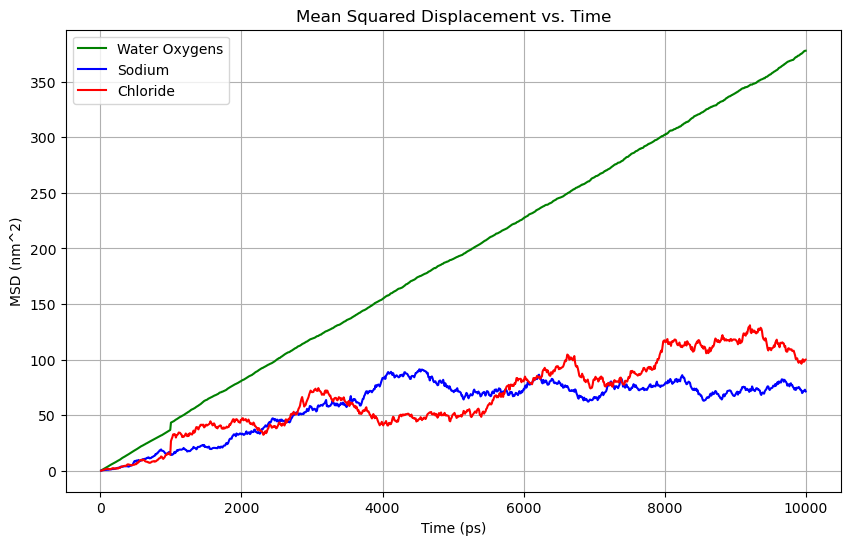

In [5]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and its topology
traj = md.load_xtc('nojump_traj.xtc', top='step5_10.gro')

def compute_msd(traj, atom_selection):
    # Select atom indices based on the provided selection string
    indices = traj.topology.select(atom_selection)
    
    # If no atoms are found for the given selection, return None
    if len(indices) == 0:
        print(f"No atoms found for selection: {atom_selection}")
        return None

    # Initialize the displacements array
    displacements = np.empty((len(traj) - 1, len(indices)))
    
    # Calculate displacements for each frame
    for i in range(1, len(traj)):
        diff = traj.xyz[i, indices, :] - traj.xyz[0, indices, :]
        displacements[i-1, :] = np.sum(diff**2, axis=1)

    # Calculate the MSD
    msd = np.mean(displacements, axis=1)
    return msd

# Compute MSD for each type of atom
water_msd = compute_msd(traj, "name O and resname HOH")  # Water Oxygens
sodium_msd = compute_msd(traj, "name SOD")                # Sodium
chloride_msd = compute_msd(traj, "name CLA")              # Chloride

# Plotting the MSD values
plt.figure(figsize=(10, 6))

# Compute the time array (excluding the first frame)
time = traj.time[1:]

# Plot MSDs only if they were successfully computed
if water_msd is not None:
    plt.plot(time, water_msd, label='Water Oxygens', color='green')
if sodium_msd is not None:
    plt.plot(time, sodium_msd, label='Sodium', color='blue')
if chloride_msd is not None:
    plt.plot(time, chloride_msd, label='Chloride', color='red')

# Set plot labels, title, legend, and grid
plt.xlabel('Time (ps)')
plt.ylabel('MSD (nm^2)')
plt.title('Mean Squared Displacement vs. Time')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
